In [1]:
import numpy as np
import pandas as pd


In [2]:
df_hr=pd.read_csv('/content/Dataset - HR Employee Attrition.csv')

In [3]:
df_hr.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

<Axes: >

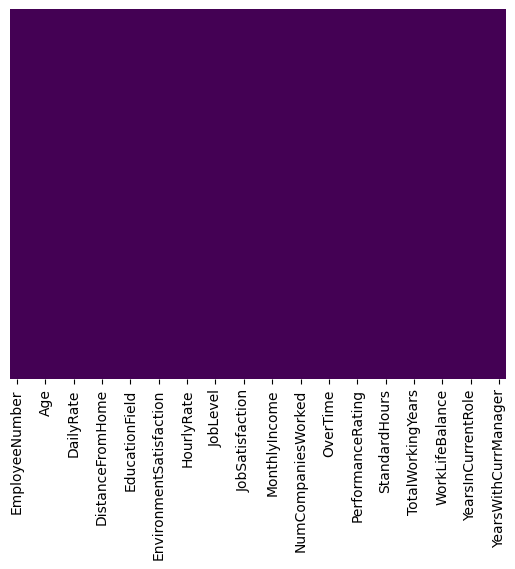

In [5]:
import seaborn as sns
sns.heatmap(df_hr.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
# this means there are no null values in the dataset

In [7]:
numerical_features = [feature for feature in df_hr.columns if df_hr[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_hr[numerical_features].head()

Number of numerical variables:  26


,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1102,1,2,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,2,49,279,8,1,1,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,3,37,1373,2,2,1,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,1392,3,4,1,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,591,2,1,1,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [8]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
discrete_feature=[feature for feature in numerical_features if len(df_hr[feature].unique())<25 and feature not in year_feature+['Id'] ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 13


In [10]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


In [11]:
discrete_feature
# dscrete feature in numerical features

['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'WorkLifeBalance']

In [12]:
continuous_feature
# continuous features in numerical features

['EmployeeNumber',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate']

In [13]:
year_feature

['TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [14]:
categorical_features = [feature for feature in df_hr.columns if df_hr[feature].dtypes == 'O']

categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [15]:
# Now we draw bar graph such that we have count of values present in discrete variables

In [16]:
df_hr['Education'].unique()

array([2, 1, 4, 3, 5])

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

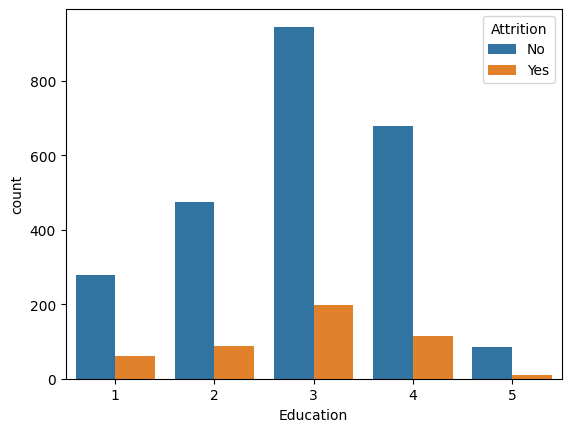

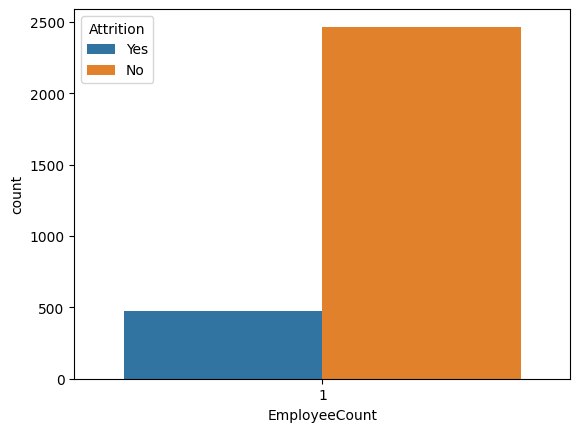

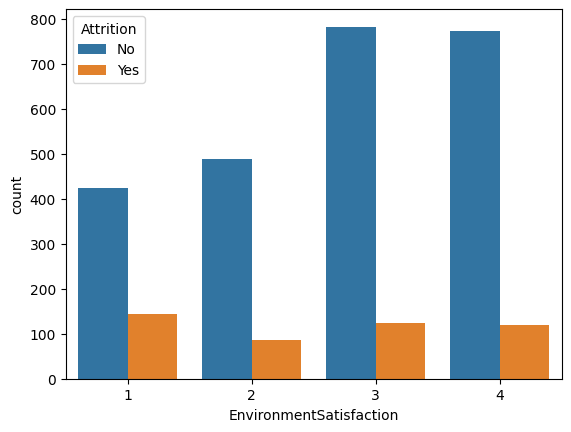

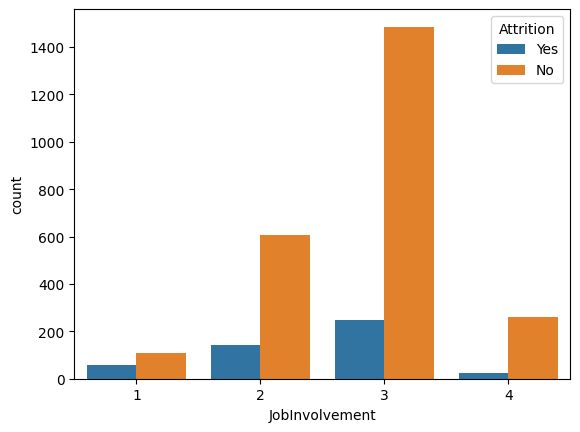

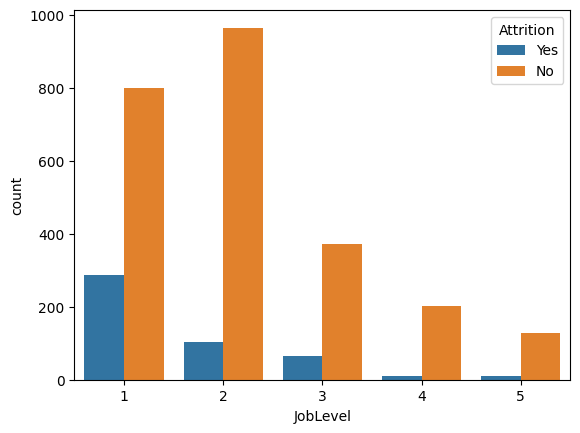

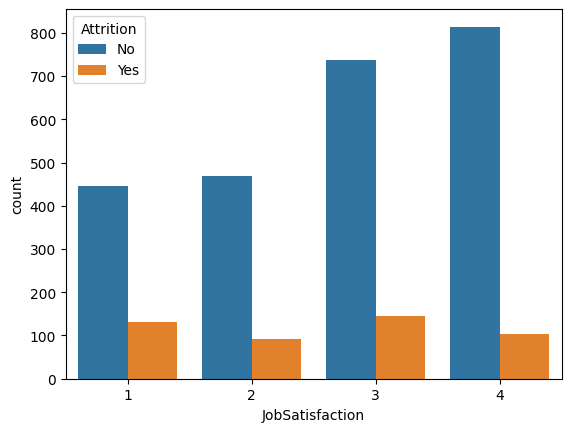

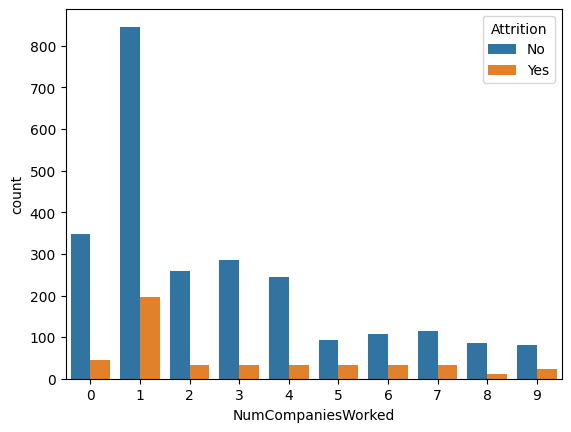

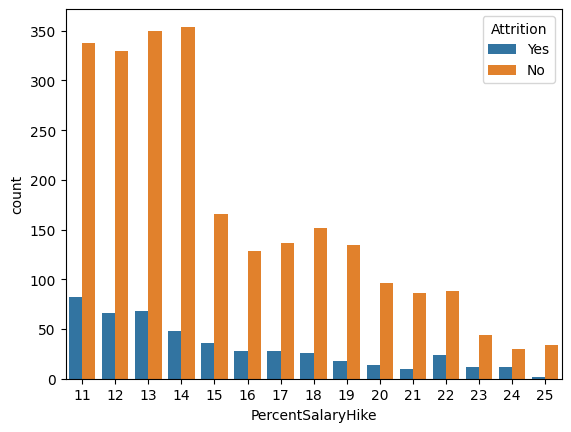

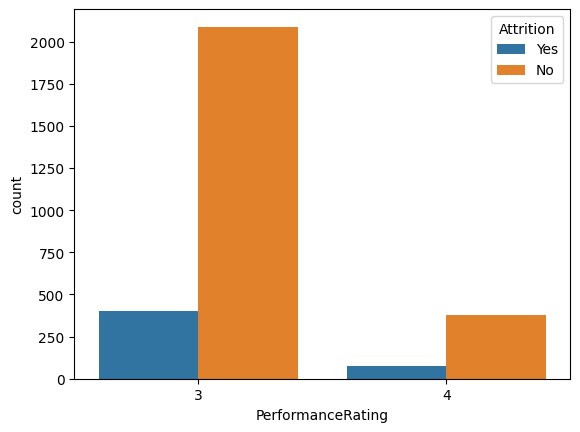

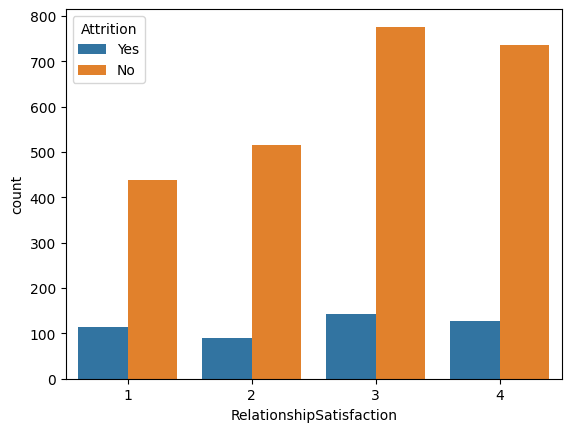

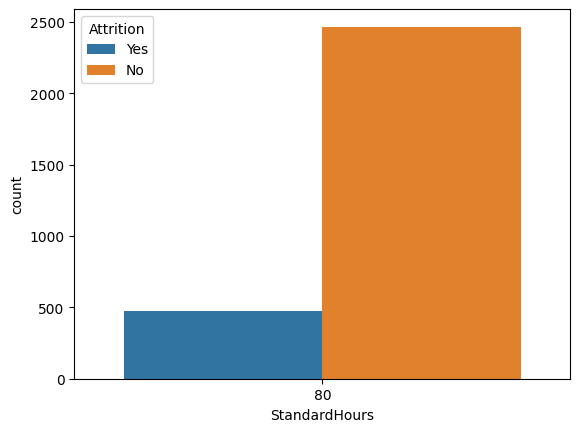

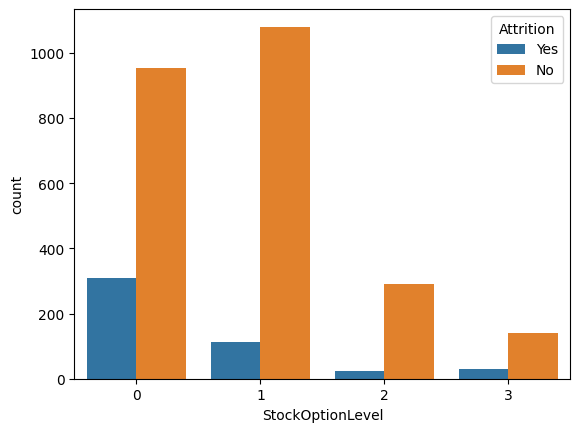

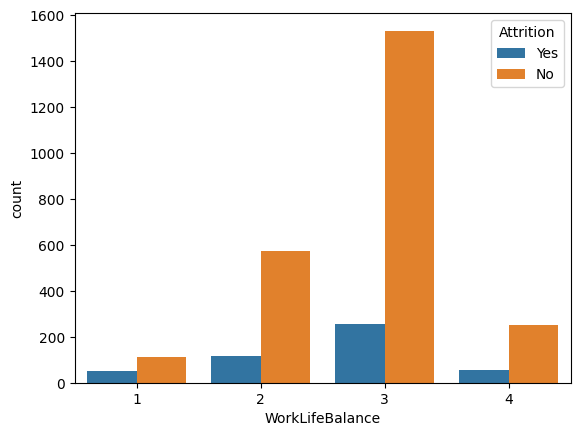

In [18]:
for feature in discrete_feature:
    sns.countplot(x=feature ,data=df_hr,hue='Attrition') # Indent this line with 4 spaces
    plt.show() # Add this line to display each plot separately

Observations:
1. for higher eduction nex low attrition
2. Employee with greater Environment Satisfaction suffer through less percentage of attrition
3. With greater job involvement percentage of attrition decreases
4. As job level increases lesser attrition observed
5. with job satisfaction increase percentage of attrition employee decrease
6. Employees that have worked in 5 or more companies have more attrition
7. With more Salary hike more employess undergo attrition
(as percentage)
8.Ignore employee count
9.Standard hours have no involvement



In [19]:
df_hr['EmployeeCount'].unique()

array([1])

In [20]:
df_hr['StandardHours'].unique()

array([80])

In [21]:
# Verify if the columns still exist in the DataFrame
if 'EmployeeCount' in df_hr.columns and 'StandardHours' in df_hr.columns:
    df_hr.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

# Verify if the elements still exist in the list
if 'EmployeeCount' in discrete_feature:
    discrete_feature.remove('EmployeeCount')
if 'StandardHours' in discrete_feature:
    discrete_feature.remove('StandardHours')

In [22]:
discrete_feature

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

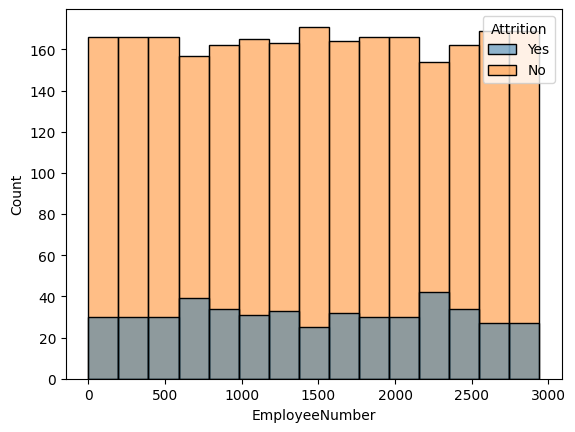

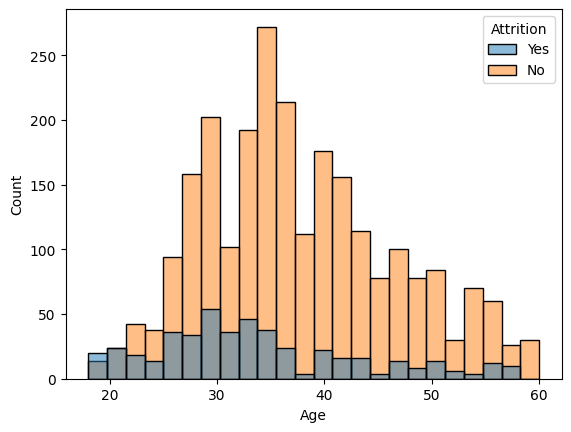

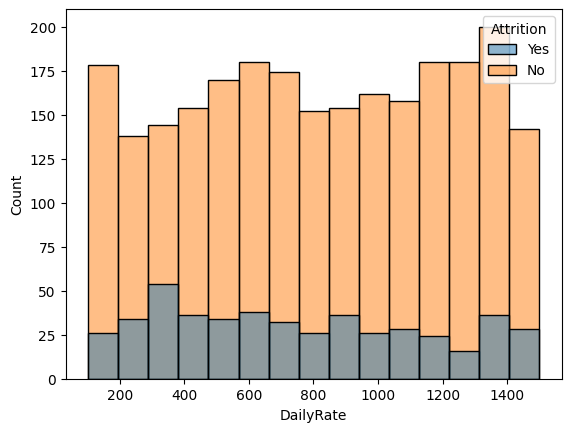

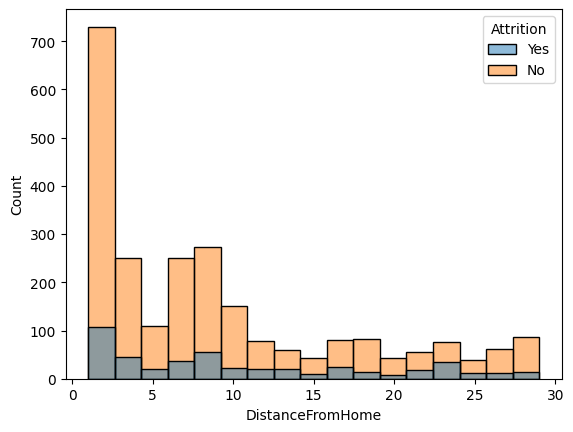

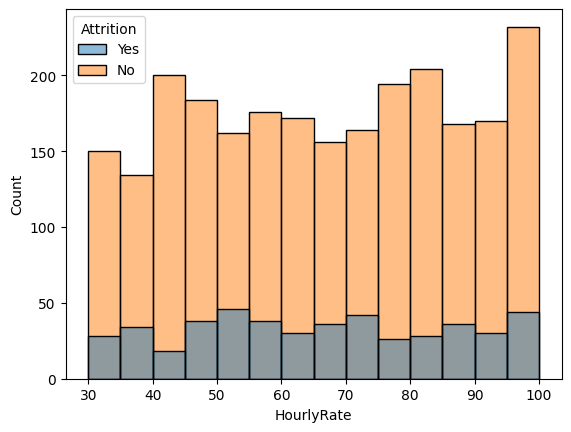

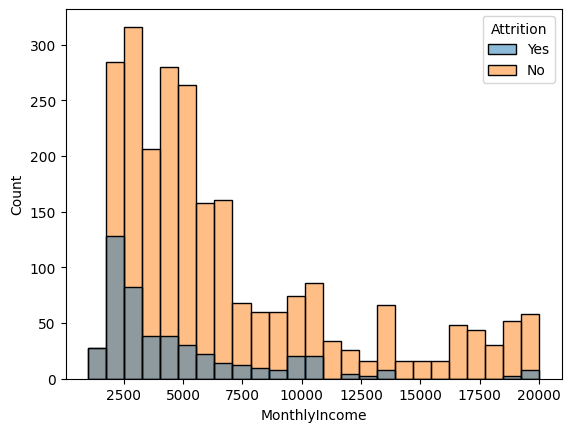

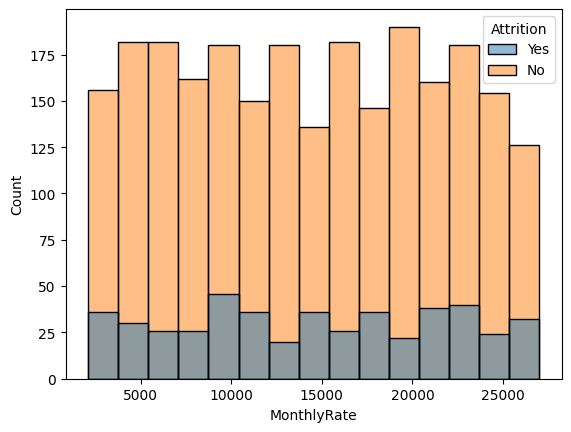

In [23]:
for feature in continuous_feature:
    sns.histplot(x=feature ,data=df_hr,hue='Attrition') # Indent this line with 4 spaces
    plt.show() # Add this line to display each plot separately

Distance from home and monthly income show skewed distribution

In [24]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

MAKING Q-Q PLOT

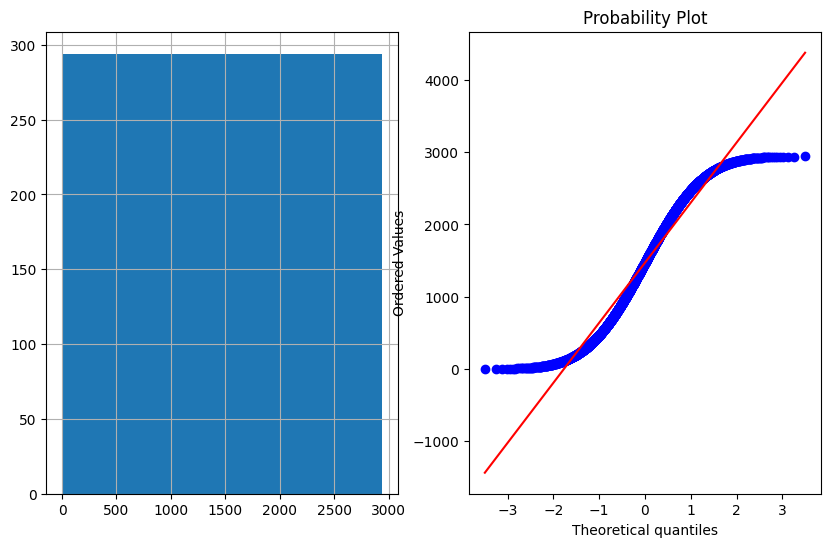

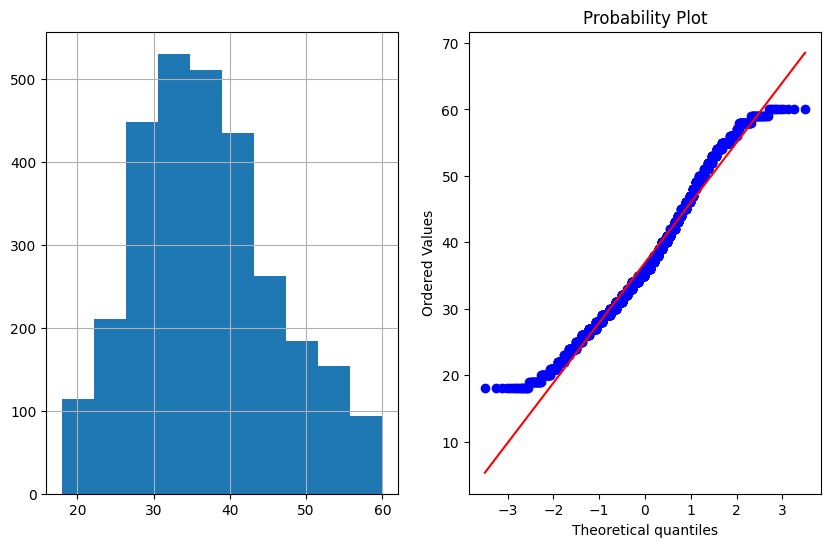

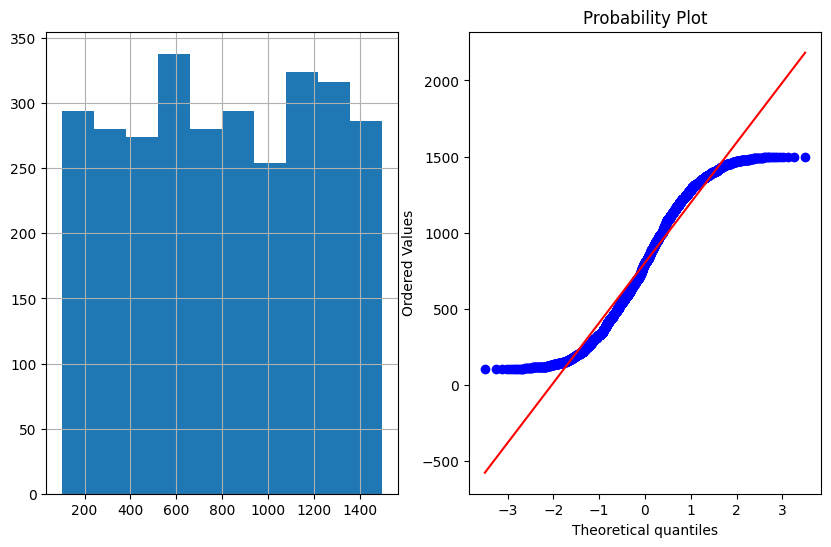

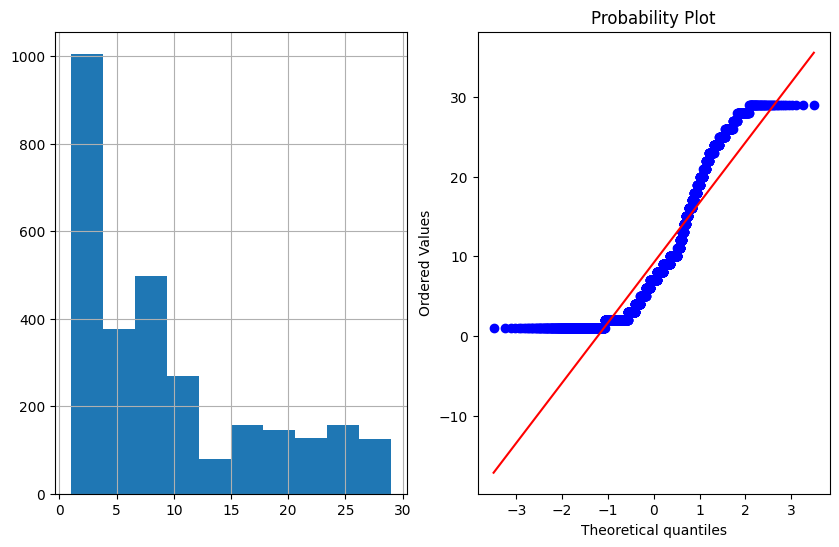

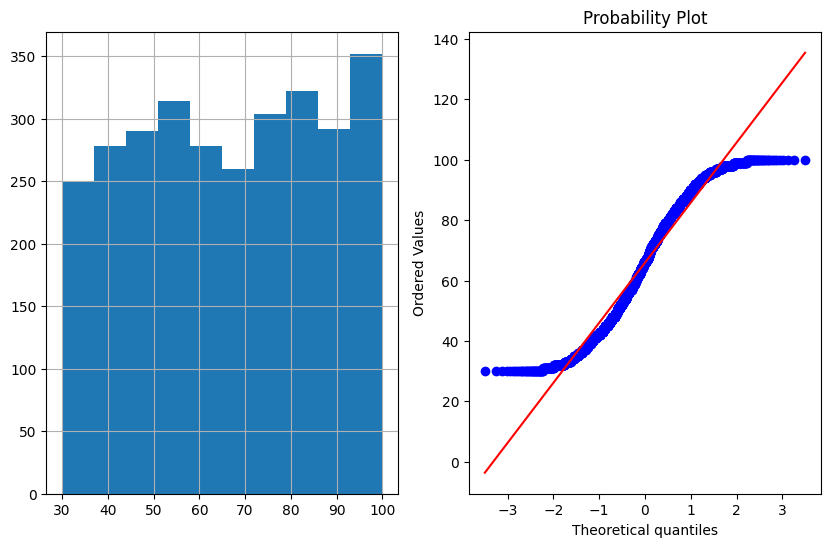

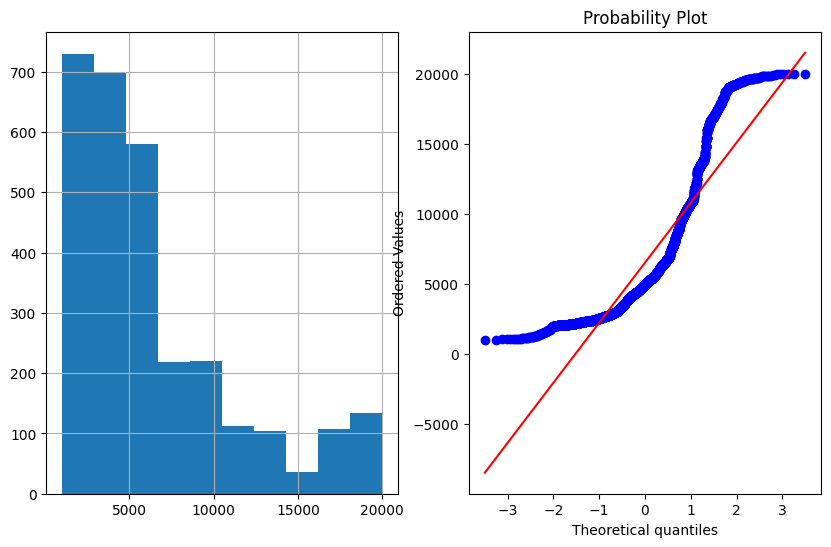

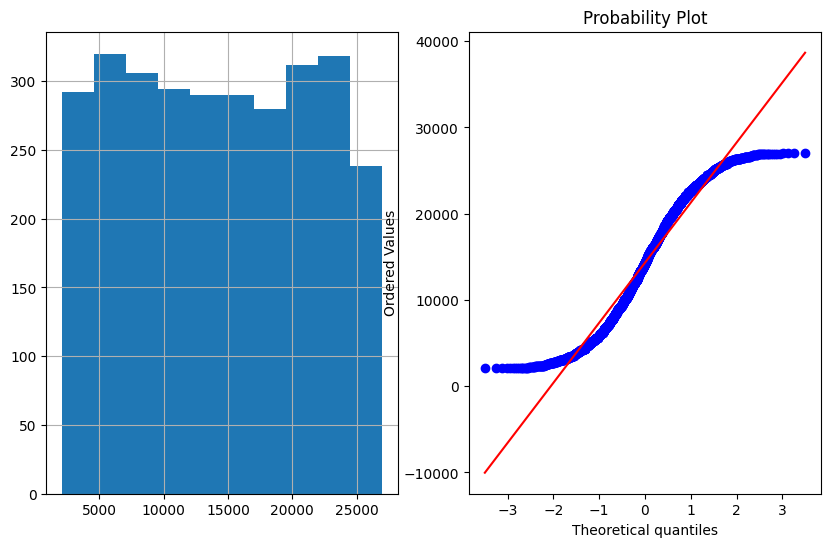

In [25]:
for feauture in continuous_feature:
    plot_data(df_hr,feauture)

Shows that we need not aplly transformation on the data as it is very near to a striaght line

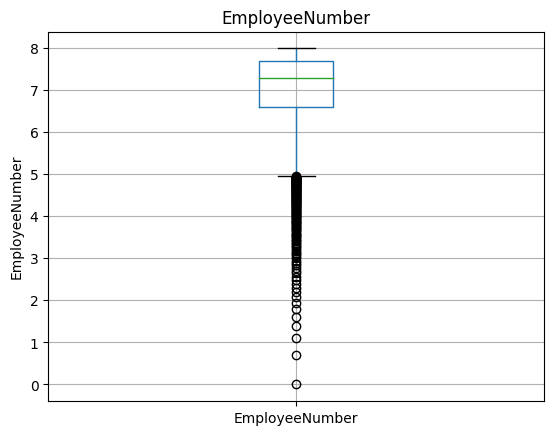

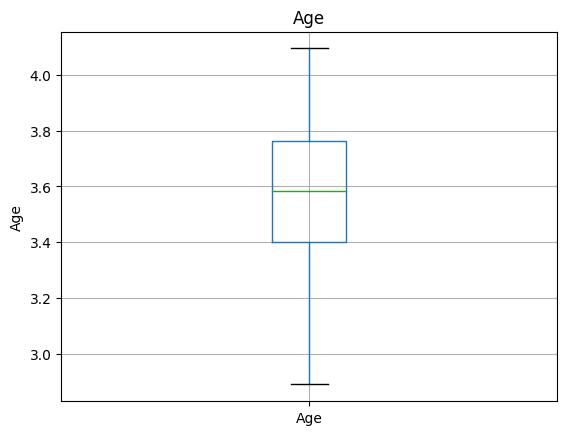

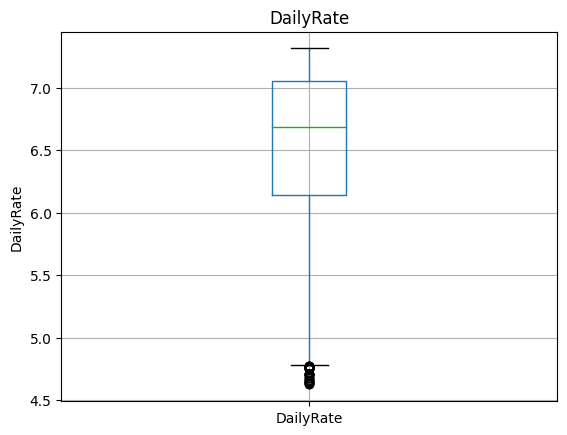

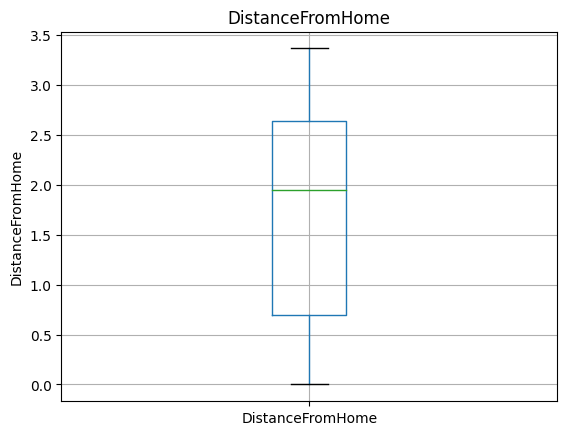

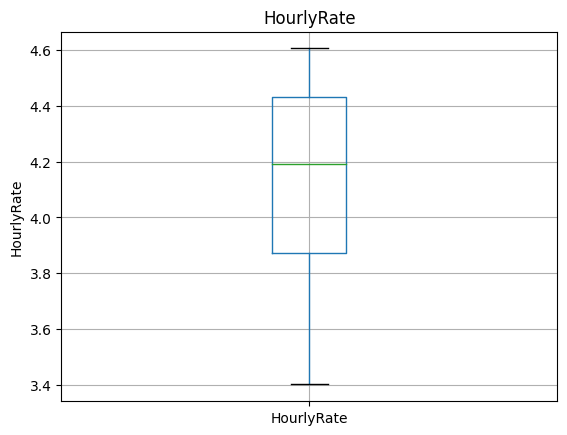

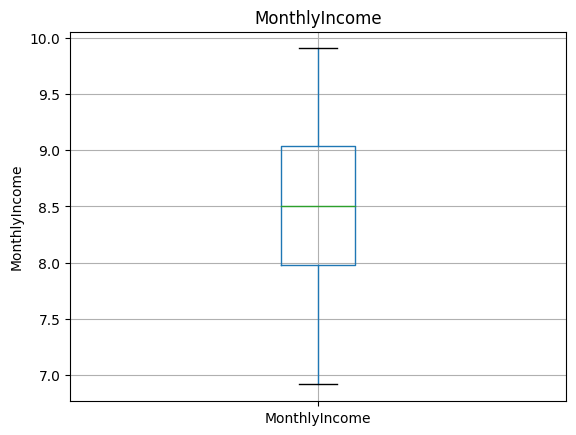

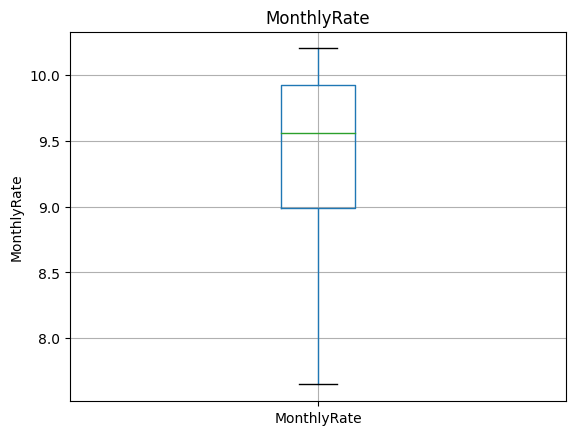

In [26]:
for feature in continuous_feature:
    data=df_hr.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Outliers detected in Daily Rate and Employee Number. Employee number is not significant to us hence we can remove that altogether

In [27]:
if 'EmployeeNumber' in df_hr.columns :
    df_hr.drop(['EmployeeNumber'],axis=1,inplace=True)

# Verify if the elements still exist in the list
if 'EmployeeNumber' in continuous_feature:
    continuous_feature.remove('EmployeeNumber')


In [28]:
 continuous_feature

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate']

In [29]:
df_hr.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [30]:
df_hr[categorical_features]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
2935,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
2936,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
2937,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
2938,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [31]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_hr[feature].unique())))

The feature is Attrition and number of categories are 2
The feature is BusinessTravel and number of categories are 3
The feature is Department and number of categories are 3
The feature is EducationField and number of categories are 6
The feature is Gender and number of categories are 2
The feature is JobRole and number of categories are 9
The feature is MaritalStatus and number of categories are 3
The feature is Over18 and number of categories are 1
The feature is OverTime and number of categories are 2


In [32]:
df_hr['Over18'].unique()

array(['Y'], dtype=object)

since all Y we drop this column

In [33]:
if 'Over18' in df_hr.columns :
    df_hr.drop(['Over18'],axis=1,inplace=True)

# Verify if the elements still exist in the list
if 'Over18' in continuous_feature:
    categorical_features.remove('Over18')

In [34]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [35]:
categorical_features.remove('Over18')

In [36]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [37]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 2940 non-null   object
 1   Age                       2940 non-null   int64 
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EnvironmentSatisfaction   2940 non-null   int64 
 9   Gender                    2940 non-null   object
 10  HourlyRate                2940 non-null   int64 
 11  JobInvolvement            2940 non-null   int64 
 12  JobLevel                  2940 non-null   int64 
 13  JobRole                   2940 non-null   object
 14  JobSatisfaction         

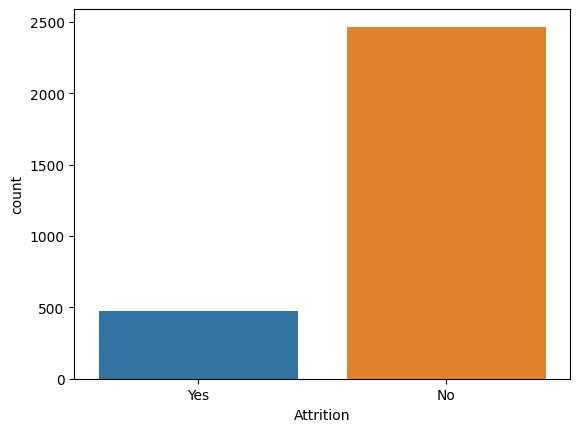

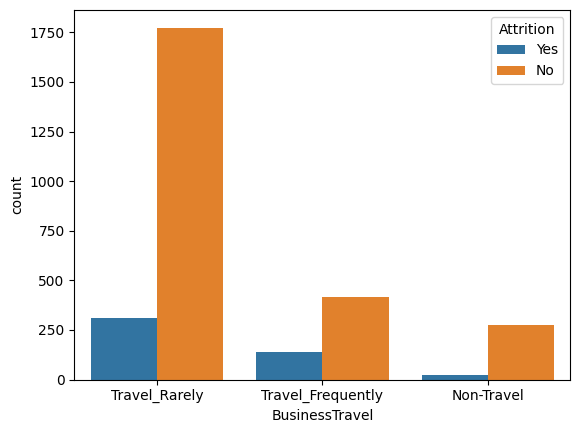

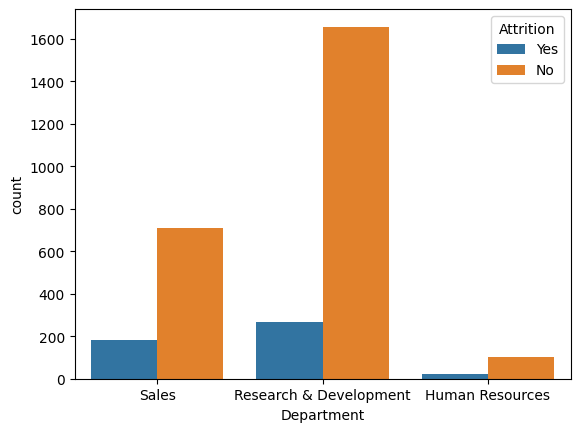

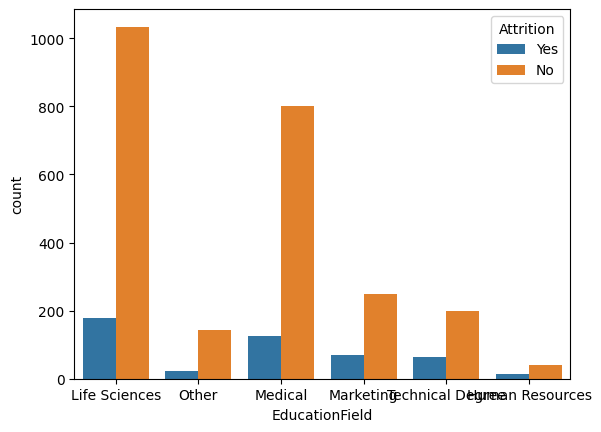

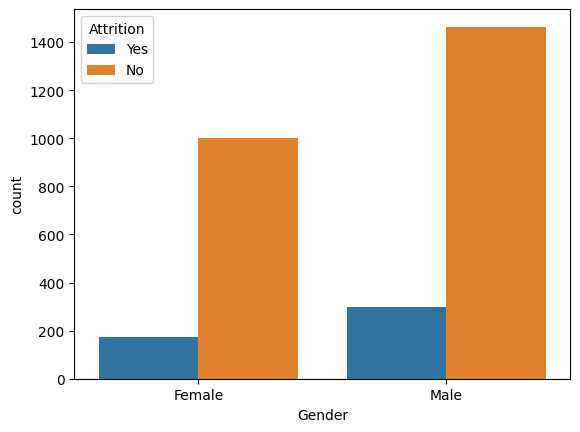

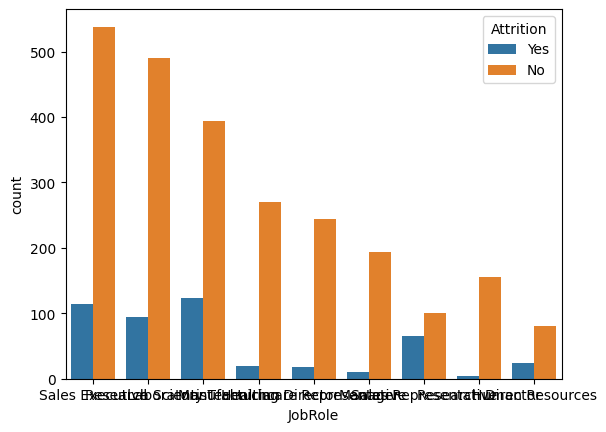

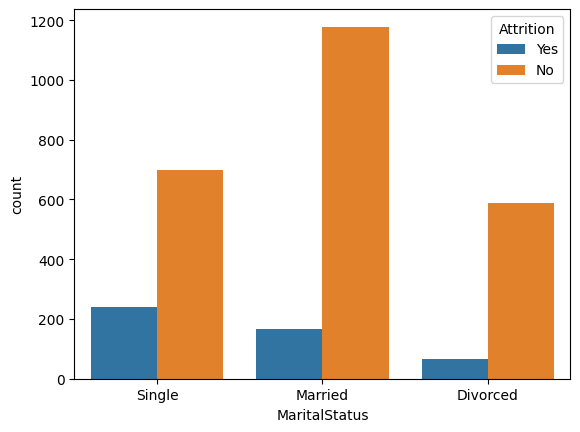

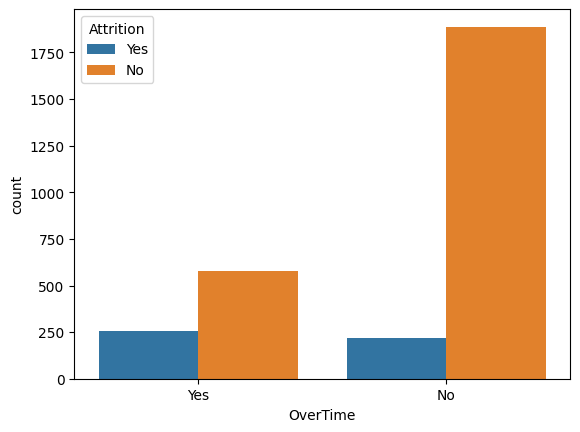

In [38]:
for feature in categorical_features:
    if feature in df_hr.columns:  # Check if feature still exists in the DataFrame
        sns.countplot(x=feature, data=df_hr, hue='Attrition')
        plt.show()

Observation:
1. No attrition corresponds to abt 2400 and yes is less than 500 so we need oversampling as data isn't very big
2. Those who travel frequently:- more % attrition
3. Most employee are from Research and development so it has most attrition
4. female 1000 : 200 and male 1400 : 250 So more attrition % among females
5. Among marital status singles are most likely to change companies. This goes hand in hand with Age observation.
Age 25 to 32-33 most attrition
6. Overtime has a great percentage of attrition. So it is a major factor

In [39]:
# Over to Encoding ,oversampling and Normalisation

In [40]:
# One hot encoding
df_hr.shape

(2940, 31)

so we can afford excess column creation

In [41]:
df_n = df_hr[categorical_features]
df_n=df_n.drop(['Attrition'],axis=1)
df_n.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [42]:
df_encoded=pd.get_dummies(df_n,drop_first=True).astype(int)
df_encoded.head()


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [43]:
df_numerical=df_hr[continuous_feature+year_feature]
df_numerical.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,19479,8,0,6,4,0,5
1,49,279,8,61,5130,24907,10,3,10,7,1,7
2,37,1373,2,92,2090,2396,7,3,0,0,0,0
3,33,1392,3,56,2909,23159,8,3,8,7,3,0
4,27,591,2,40,3468,16632,6,3,2,2,2,2


In [44]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   BusinessTravel_Travel_Frequently   2940 non-null   int64
 1   BusinessTravel_Travel_Rarely       2940 non-null   int64
 2   Department_Research & Development  2940 non-null   int64
 3   Department_Sales                   2940 non-null   int64
 4   EducationField_Life Sciences       2940 non-null   int64
 5   EducationField_Marketing           2940 non-null   int64
 6   EducationField_Medical             2940 non-null   int64
 7   EducationField_Other               2940 non-null   int64
 8   EducationField_Technical Degree    2940 non-null   int64
 9   Gender_Male                        2940 non-null   int64
 10  JobRole_Human Resources            2940 non-null   int64
 11  JobRole_Laboratory Technician      2940 non-null   int64
 12  JobRole_Manager     

In [45]:
df_hr.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [46]:
df_encoded.describe()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,0.188435,0.709524,0.653741,0.303401,0.412245,0.108163,0.315646,0.055782,0.089796,0.600000,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728,0.282993
std,0.391126,0.454059,0.475858,0.459805,0.492323,0.310639,0.464852,0.229540,0.285938,0.489981,...,0.381047,0.254156,0.298228,0.226887,0.399044,0.415507,0.230852,0.498303,0.466450,0.450530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df_numerical.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,20.325969,4707.155770,7116.575021,7.779458,1.289051,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,84.000000,8380.000000,20462.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [48]:
#prefer standard scale here min max in ANN

In [49]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Make sure pandas is imported

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_numerical)
df_scaled=pd.DataFrame(df_scaled,columns=df_numerical.columns) # Use "DataFrame", not "Dataframe"
df_scaled.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03
mean,-3.504377e-17,5.196146e-17,4.591943e-17,1.691768e-16,-4.410682e-17,2.779334e-17,-1.812609e-18,8.579683e-17,-3.262696e-17,9.183886e-17,2.416812e-18,-2.688703e-17
std,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00
min,-2.072192e+00,-1.736576e+00,-1.010909e+00,-1.766079e+00,-1.167343e+00,-1.717284e+00,-1.450167e+00,-2.171982e+00,-1.144294e+00,-1.167687e+00,-6.791457e-01,-1.155935e+00
25%,-7.581700e-01,-8.366616e-01,-8.875151e-01,-8.803615e-01,-7.632087e-01,-8.809251e-01,-6.787735e-01,-6.201892e-01,-6.544537e-01,-6.154916e-01,-6.791457e-01,-5.952272e-01
50%,-1.011589e-01,-1.204135e-03,-2.705440e-01,5.355811e-03,-3.365516e-01,-1.090645e-02,-1.645114e-01,1.557071e-01,-3.278933e-01,-3.393937e-01,-3.687153e-01,-3.148735e-01
75%,6.653541e-01,8.788772e-01,5.932157e-01,8.910731e-01,3.988370e-01,8.641717e-01,4.783162e-01,1.557071e-01,3.252275e-01,7.649976e-01,2.521455e-01,8.065415e-01
max,2.526886e+00,1.726730e+00,2.444129e+00,1.678377e+00,2.867626e+00,1.782888e+00,3.692454e+00,2.483396e+00,5.386914e+00,3.802074e+00,3.977310e+00,3.610079e+00


In [50]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [51]:
df_res=pd.concat([df_hr['Attrition'],df_scaled,df_encoded],axis=1)
df_res.head()

,Attrition,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,Yes,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,-0.421642,-2.171982,-0.164613,...,0,0,0,0,0,1,0,0,1,1
1,No,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.164511,0.155707,0.488508,...,0,0,0,0,1,0,0,1,0,0
2,Yes,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,-0.550208,0.155707,-1.144294,...,1,0,0,0,0,0,0,0,1,1
3,No,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.421642,0.155707,0.161947,...,0,0,0,0,1,0,0,1,0,1
4,No,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,-0.678774,0.155707,-0.817734,...,1,0,0,0,0,0,0,1,0,0


In [52]:
df_res.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,...,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,-3.504377e-17,5.196146e-17,4.591943e-17,1.691768e-16,-4.410682e-17,2.779334e-17,-1.812609e-18,8.579683e-17,-3.262696e-17,9.183886e-17,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728,0.282993
std,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,...,0.381047,0.254156,0.298228,0.226887,0.399044,0.415507,0.230852,0.498303,0.466450,0.450530
min,-2.072192e+00,-1.736576e+00,-1.010909e+00,-1.766079e+00,-1.167343e+00,-1.717284e+00,-1.450167e+00,-2.171982e+00,-1.144294e+00,-1.167687e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.581700e-01,-8.366616e-01,-8.875151e-01,-8.803615e-01,-7.632087e-01,-8.809251e-01,-6.787735e-01,-6.201892e-01,-6.544537e-01,-6.154916e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.011589e-01,-1.204135e-03,-2.705440e-01,5.355811e-03,-3.365516e-01,-1.090645e-02,-1.645114e-01,1.557071e-01,-3.278933e-01,-3.393937e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.653541e-01,8.788772e-01,5.932157e-01,8.910731e-01,3.988370e-01,8.641717e-01,4.783162e-01,1.557071e-01,3.252275e-01,7.649976e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2.526886e+00,1.726730e+00,2.444129e+00,1.678377e+00,2.867626e+00,1.782888e+00,3.692454e+00,2.483396e+00,5.386914e+00,3.802074e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This is followed by Oversampling check.
Following this check if attrition col 0 1 needed else build model by hyperparameter tuning. AT the end try neural network approach as well

df_res has all standardised except categorically encoded columns while df_res2 has all standardised.

In [53]:
#df_res.to_csv('HRattrition_version2.csv',index=False) # Change 'false' to 'False'

In [54]:
#from google.colab import files

#files.download('HRattrition_version2.csv')

proceeding with df_res

In [55]:
df_res['Attrition'].value_counts()

Attrition
No     2466
Yes     474
Name: count, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_res['Attrition'] = le.fit_transform(df_res['Attrition'])

In [57]:
# thus we need to do oversampling here

separating input and output columns and doing OVERSAMPLING

In [58]:
x=df_res.drop('Attrition',axis=1)
y=df_res['Attrition']

In [59]:
y.value_counts()

Attrition
0    2466
1     474
Name: count, dtype: int64

In [60]:
from imblearn.over_sampling import RandomOverSampler
# Use 'sampling_strategy' instead of 'ratio'
os = RandomOverSampler(sampling_strategy=0.6)
x_res, y_res = os.fit_resample(x, y)

In [61]:
y_res

0       1
1       0
2       1
3       0
4       0
       ..
3940    1
3941    1
3942    1
3943    1
3944    1
Name: Attrition, Length: 3945, dtype: int64

In [62]:
y_res.value_counts()

Attrition
0    2466
1    1479
Name: count, dtype: int64

In [63]:
x_res.shape

(3945, 33)

In [64]:
x_res.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,-0.421642,-2.171982,-0.164613,-0.063296,...,0,0,0,0,0,1,0,0,1,1
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.164511,0.155707,0.488508,0.764998,...,0,0,0,0,1,0,0,1,0,0
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,-0.550208,0.155707,-1.144294,-1.167687,...,1,0,0,0,0,0,0,0,1,1
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.421642,0.155707,0.161947,0.764998,...,0,0,0,0,1,0,0,1,0,1
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,-0.678774,0.155707,-0.817734,-0.615492,...,1,0,0,0,0,0,0,1,0,0


**Model Building**

<Axes: >

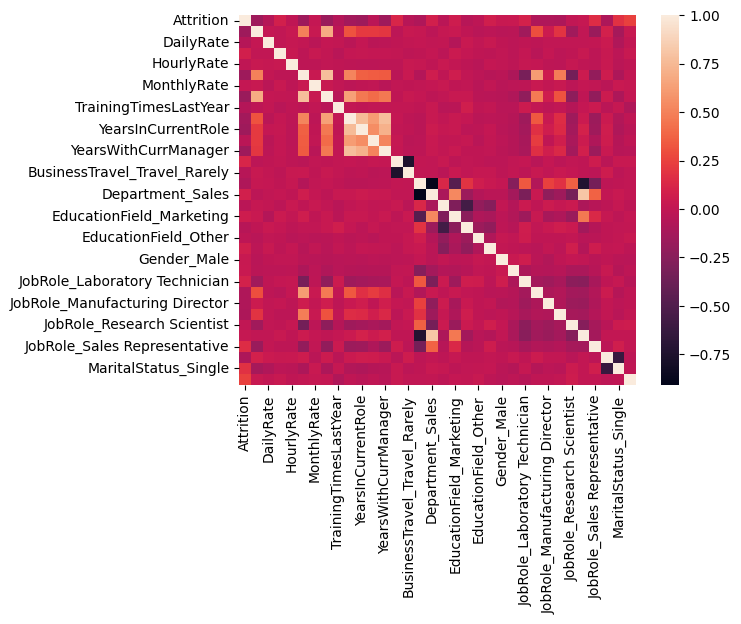

In [65]:
import seaborn as sns
sns.heatmap(df_res.corr(), annot=False)  # Change 'true' to 'True'

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [67]:
y_train.value_counts()

Attrition
0    1853
1     352
Name: count, dtype: int64

In [68]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear','poly']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [20,60, 100, 120],
            #'max_features': ['sqrt', 'log2'], # Removed 'auto'
            'max_features': [0.2, 0.6, 1.0],
            'max_depth': [2,8,None],
            'max_samples': [0.5, 0.7, 1.0]

        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [ 9, 11, 13, 17, 19],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    },
    'xgboost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5,10,15,20, None],
            'min_samples_split': [3, 5, 10, 20]
        }
    }
}


In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train) # Changed Y_train to y_train
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.897506,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.949206,"{'max_depth': None, 'max_features': 0.2, 'max_..."
2,logistic_regression,0.862585,"{'C': 1, 'penalty': 'l1'}"
3,knn,0.947392,"{'metric': 'manhattan', 'n_neighbors': 19, 'we..."
4,naive_bayes,0.606803,{'var_smoothing': 1e-07}
5,xgboost,0.948753,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."
6,decision_tree,0.912925,"{'criterion': 'entropy', 'max_depth': None, 'm..."


In [71]:
knn_neigh=scores[3]
knn_m=knn_neigh['best_params']
knn_m_n=knn_m['n_neighbors']
knn_m_w=knn_m['weights']
knn_m_m=knn_m['metric']
knn_m

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [72]:
random_f=scores[1].get('best_params')
random_f_maxd=random_f['max_depth']
random_f_maxf=random_f['max_features']
random_f_n=random_f['n_estimators']
random_f_maxs=random_f['max_samples']
random_f

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 120}

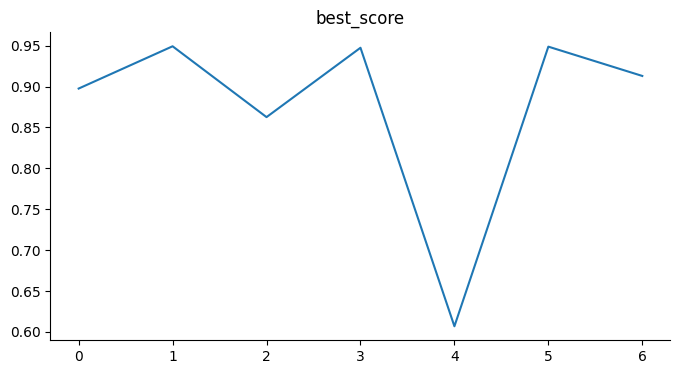

In [73]:
# @title best_score

from matplotlib import pyplot as plt
df['best_score'].plot(kind='line', figsize=(8, 4), title='best_score')
plt.gca().spines[['top', 'right']].set_visible(False)

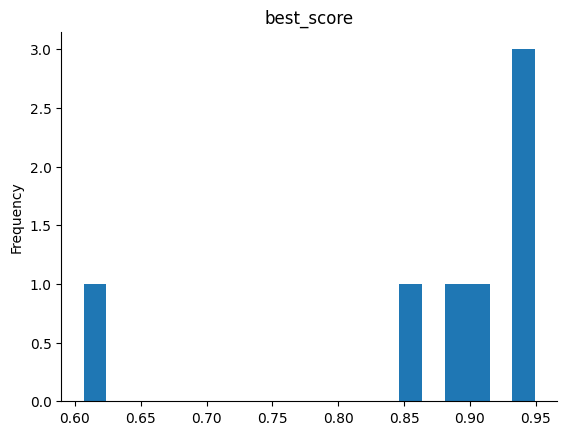

In [74]:
# @title best_score

from matplotlib import pyplot as plt
df['best_score'].plot(kind='hist', bins=20, title='best_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

Best Output given by random_forest and knn

In [75]:
# Selection model as knn with specifications as 'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance' ON CPU

In [76]:
# Selection model as knn with specifications as '{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'} on T4 GPU

In [77]:
X_train.shape

(2205, 33)

In [78]:
X_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
2649,-0.320163,0.811941,-0.764121,0.005356,-0.227338,0.705360,-0.035946,-0.620189,0.651788,1.041095,...,0,0,0,0,1,0,0,0,0,0
1113,-0.539166,0.985479,-1.010909,-0.191470,-0.513334,1.526401,-0.293077,0.155707,-0.164613,0.212802,...,0,0,0,0,1,0,0,1,0,0
2398,0.774856,-0.449922,0.716610,0.349801,0.313421,-0.033463,-0.164511,-0.620189,0.488508,0.764998,...,0,0,0,0,0,0,0,1,0,0
2237,0.008343,-1.682035,-0.764121,-1.520046,-0.509084,-0.065366,-0.421642,0.155707,-0.491174,-0.339394,...,0,0,0,0,0,0,0,0,1,0
2043,-1.196177,0.851607,-0.147150,-1.372427,-0.250073,-1.580960,-0.678774,-0.620189,-0.491174,-0.339394,...,0,0,0,0,0,1,0,0,1,0


knn is final model

In [79]:
#for T4 GPU
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=knn_m_n , weights=knn_m_w, metric=knn_m_m)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')

In [80]:
# for cpu
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=17, weights='distance', metric='euclidean')
# knn.fit(X_train, y_train)

In [81]:
pred = knn.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [82]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))
pd.crosstab(y_test, pred, rownames = ['Actual'], colnames= ['Predictions'])

0.9510204081632653


Predictions,0,1
Actual,,
0,613,0
1,36,86



*   0.9673469387755103 ie We have accuracy score of **96 % on Test Data on CPU**
*   0.9727891156462585 We have accuracy score of **97 % on Test Data on T4 GPU**


**Trying out the random forest approach**

In [83]:
X_train.shape

(2205, 33)

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=random_f_maxd, max_features=random_f_maxf, n_estimators=random_f_n, max_samples=random_f_maxs)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, max_samples=1.0, n_estimators=120)

In [85]:
pred_rf=rf.predict(X_test)
pred_rf

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [86]:
rf.score(X_test,y_test)

0.9564625850340136

In [87]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred_rf))
pd.crosstab(y_test, pred_rf, rownames = ['Actual'], colnames= ['Predictions'])

0.9564625850340136


Predictions,0,1
Actual,,
0,613,0
1,32,90


**Trying out a neural networks approach for the same **

In [88]:
!pip install tensorflow

In [89]:
import tensorflow as tf

In [90]:
import tensorflow.keras.layers as layers

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPClassifier


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [93]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      2940 non-null   int64
 1   DailyRate                2940 non-null   int64
 2   DistanceFromHome         2940 non-null   int64
 3   HourlyRate               2940 non-null   int64
 4   MonthlyIncome            2940 non-null   int64
 5   MonthlyRate              2940 non-null   int64
 6   TotalWorkingYears        2940 non-null   int64
 7   TrainingTimesLastYear    2940 non-null   int64
 8   YearsAtCompany           2940 non-null   int64
 9   YearsInCurrentRole       2940 non-null   int64
 10  YearsSinceLastPromotion  2940 non-null   int64
 11  YearsWithCurrManager     2940 non-null   int64
dtypes: int64(12)
memory usage: 275.8 KB


In [94]:
from sklearn import preprocessing
df_normalised=preprocessing.normalize(df_numerical)
df_normalised=pd.DataFrame(df_normalised,columns=df_numerical.columns)
df_normalised.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.002009,0.053993,0.000049,0.004606,0.293629,0.954380,0.000392,0.000000,0.000294,0.000196,0.000000,0.000245
1,0.001927,0.010971,0.000315,0.002399,0.201719,0.979377,0.000393,0.000118,0.000393,0.000275,0.000039,0.000275
2,0.010679,0.396286,0.000577,0.026554,0.603232,0.691552,0.002020,0.000866,0.000000,0.000000,0.000000,0.000000
3,0.001411,0.059532,0.000128,0.002395,0.124409,0.990439,0.000342,0.000128,0.000342,0.000299,0.000128,0.000000
4,0.001588,0.034765,0.000118,0.002353,0.203999,0.978349,0.000353,0.000176,0.000118,0.000118,0.000118,0.000118


Normalised Data for Neural Netwrorks approach

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_attrition = le.fit_transform(df_hr['Attrition'])
# Convert the NumPy array into a Pandas Series
df_attrition = pd.Series(df_attrition, name='Attrition')

df_res3=pd.concat([df_attrition,df_normalised,df_encoded ],axis=1)
df_res3.head()

,Attrition,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0.002009,0.053993,0.000049,0.004606,0.293629,0.954380,0.000392,0.000000,0.000294,...,0,0,0,0,0,1,0,0,1,1
1,0,0.001927,0.010971,0.000315,0.002399,0.201719,0.979377,0.000393,0.000118,0.000393,...,0,0,0,0,1,0,0,1,0,0
2,1,0.010679,0.396286,0.000577,0.026554,0.603232,0.691552,0.002020,0.000866,0.000000,...,1,0,0,0,0,0,0,0,1,1
3,0,0.001411,0.059532,0.000128,0.002395,0.124409,0.990439,0.000342,0.000128,0.000342,...,0,0,0,0,1,0,0,1,0,1
4,0,0.001588,0.034765,0.000118,0.002353,0.203999,0.978349,0.000353,0.000176,0.000118,...,1,0,0,0,0,0,0,1,0,0


In [96]:
x_2=df_res3.drop('Attrition',axis=1)
y_2=df_res3['Attrition']

In [97]:
y_2.value_counts()

Attrition
0    2466
1     474
Name: count, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x_2, y_2, test_size=0.25)

In [100]:
X2_train.shape

(2205, 33)

In [101]:
y2_train.shape

(2205,)

In [102]:
def design_mlp():
    model = Sequential()
    model.add(Dense(150,input_shape =(None,2205,33),activation="tanh")) # Input shape should be (33,)
    model.add(Dense(200,activation="tanh"))
    model.add(Dense(100,activation="tanh"))
    model.add(Dense(1000,activation="tanh"))
    model.add(Dense(1,activation="sigmoid")) # Output layer for binary classification
    model.compile(loss="mean_squared_error",optimizer="adam",metrics=['mean_squared_error']) # Use binary_crossentropy for binary classification
    return model

 2. Loss Function
For binary classification, use binary_crossentropy instead of mean_squared_error. This loss function is more appropriate for classification tasks.
3. Metrics
Use accuracy as a metric instead of mean_squared_error to evaluate the model’s performance on classification tasks.

In [103]:
model = design_mlp()


In [104]:
model.fit(X2_train,y2_train,epochs=100, batch_size=5)

Epoch 1/100
441/441 [==============================] - 7s 7ms/step - loss: 0.1374 - mean_squared_error: 0.1374
Epoch 2/100
441/441 [==============================] - 3s 8ms/step - loss: 0.1192 - mean_squared_error: 0.1192
Epoch 3/100
441/441 [==============================] - 4s 9ms/step - loss: 0.1155 - mean_squared_error: 0.1155
Epoch 4/100
441/441 [==============================] - 3s 7ms/step - loss: 0.1181 - mean_squared_error: 0.1181
Epoch 5/100
441/441 [==============================] - 3s 7ms/step - loss: 0.1180 - mean_squared_error: 0.1180
Epoch 6/100
441/441 [==============================] - 3s 6ms/step - loss: 0.1160 - mean_squared_error: 0.1160
Epoch 7/100
441/441 [==============================] - 4s 9ms/step - loss: 0.1164 - mean_squared_error: 0.1164
Epoch 8/100
441/441 [==============================] - 3s 8ms/step - loss: 0.1195 - mean_squared_error: 0.1195
Epoch 9/100
441/441 [==============================] - 3s 7ms/step - loss: 0.1161 - mean_squared_error: 0.1161
E

In [105]:
# Evaluating the model on test data
eval_score_test = model.evaluate(X2_test,y2_test,verbose=1)
accuracy=(1-eval_score_test[1])*100
accuracy

23/23 [==============================] - 0s 3ms/step - loss: 0.1003 - mean_squared_error: 0.1003


89.97439816594124

In [106]:
# Evaluating the model on train data
eval_score_train = model.evaluate(X2_train,y2_train,verbose=1)
accuracy=(1-eval_score_train[1])*100
accuracy

69/69 [==============================] - 0s 2ms/step - loss: 0.0459 - mean_squared_error: 0.0459


95.40818482637405

MODEL DEPLOYMENT AND OUTPUT

In [107]:
df_p=X_train
df_p.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
2649,-0.320163,0.811941,-0.764121,0.005356,-0.227338,0.705360,-0.035946,-0.620189,0.651788,1.041095,...,0,0,0,0,1,0,0,0,0,0
1113,-0.539166,0.985479,-1.010909,-0.191470,-0.513334,1.526401,-0.293077,0.155707,-0.164613,0.212802,...,0,0,0,0,1,0,0,1,0,0
2398,0.774856,-0.449922,0.716610,0.349801,0.313421,-0.033463,-0.164511,-0.620189,0.488508,0.764998,...,0,0,0,0,0,0,0,1,0,0
2237,0.008343,-1.682035,-0.764121,-1.520046,-0.509084,-0.065366,-0.421642,0.155707,-0.491174,-0.339394,...,0,0,0,0,0,0,0,0,1,0
2043,-1.196177,0.851607,-0.147150,-1.372427,-0.250073,-1.580960,-0.678774,-0.620189,-0.491174,-0.339394,...,0,0,0,0,0,1,0,0,1,0


In [131]:
import pickle


In [132]:
pickle.dump(rf,open('rfmodel.pkl','wb'))

In [133]:
pickled_model=pickle.load(open('rfmodel.pkl','rb'))

In [134]:
import pandas as pd # Make sure you import pandas correctly

var=df_n
var=pd.get_dummies(df_n,drop_first=True).astype(int) # Now use pd to access pandas functions
var.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [135]:

q=scaler.fit_transform(df_numerical)
q=pd.DataFrame(q,columns=df_numerical.columns)
q.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


In [136]:
inp=pd.concat([var,q],axis=1)
inp.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,...,-1.010909,1.383138,-0.108350,0.726020,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1,0,1,0,1,0,0,0,0,1,...,-0.147150,-0.240677,-0.291719,1.488876,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0,1,1,0,0,0,0,1,0,1,...,-0.887515,1.284725,-0.937654,-1.674841,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,1,0,1,0,1,0,0,0,0,0,...,-0.764121,-0.486709,-0.763634,1.243211,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,0,1,1,0,0,0,1,0,0,1,...,-0.887515,-1.274014,-0.644858,0.325900,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


In [138]:
# Use .iloc to access the first row of the DataFrame and convert it to a NumPy array
pickled_model.predict(x_res.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])